# Manipulación de armónicos esféricos con SymPy
En este notebook vemos cómo calcular algunas propiedades e integrales de los armónicos esféricos usando SymPy. Las funciones especiales implementadas en SymPy están descriptas acá: https://docs.sympy.org/latest/modules/functions/special.html. Recuerden que cada celda a continuación debe ejecutarse en orden, apretando SHIFT+ENTER:

In [1]:
# El código en esta celda asegura que SymPy funcione correctamente en Google colab o en sus computadoras
import os
if "COLAB_GPU" in os.environ:
  from sympy import *
  def custom_latex_printer(expr, **options):
      from IPython.display import Math, HTML
      from google.colab.output._publish import javascript
      url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_CHTML"
      javascript(content="""window.MathJax = { tex2jax: { inlineMath: [ ['$','$'] ], processEscapes: true } };""")
      javascript(url=url)
      return latex(expr, **options)
  init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)
else:
  from sympy import *
  init_printing()

In [2]:
# Definimos variables simbólicas; noten que definimos a l como entero positivo y a m como entero
l = symbols("l", integer=True, positive=True)
m = symbols("m", integer=True)
theta,phi = symbols("theta phi", real=True)

## Simetrías de los armónicos esféricos
Comencemos verificando algunas propiedades de los armónicos esféricos frente a rotaciones alrededor del eje z, cambios de m por -m, y cálculo del conjugado del armónico esférico:

In [3]:
# Veamos cuanto vale el armónico esférico de -m
Ynm(l, -m, theta, phi)

In [4]:
# Y comparemos este resultado con el armónico esférico evaluado en -phi
Ynm(l, m, theta, -phi)

In [5]:
# Y con el conjugado del armónico esférico
conjugate(Ynm(l, m, theta, phi))

## Expresiones explícitas de los armónicos esféricos
Veamos algunas expresiones explícitas, en el caso general, y para valores particulares de l y m. Para eso usamos el comando "expand", y "simplify" para simplificar el resultado:

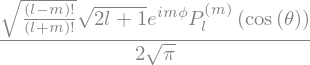

In [6]:
# Veamos la expresión explícita de los armónicos esféricos para cualquier valor de l y m
simplify(Ynm(l, m, theta, phi).expand(func=True))

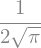

In [7]:
# Y veamos la expresión para algún valor partícular de l y m (prueben cambiar los valores)
simplify(Ynm(0, 0, theta, phi).expand(func=True))

## Derivadas de armónicos esféricos
Calculemos las derivadas de los armónicos esféricos usando el comando "diff" (pueden encontrar detalles sobre el comando "diff" en https://docs.sympy.org/latest/tutorial/calculus.html).

In [8]:
# Derivada respecto a theta
diff(Ynm(l, m, theta, phi), theta)

In [9]:
# Derivada respecto a phi
diff(Ynm(l, m, theta, phi), phi)

## Integrales de armónicos esféricos
SymPy es bastante limitado a la hora de calcular integrales que requieran reconocer ortogonalidad de funciones, o propiedades generales de este tipo de funciones. Pero puede servir de ayuda a la hora de calcular ciertas integrales, o por lo menos, a la hora de ver cómo empezar una cuenta. Veamos cómo calcular integrales definidas de los armónicos esféricos usando "integrate" (vean https://docs.sympy.org/latest/tutorial/calculus.html para mas detalles del cálculo de integrales simbólicas en SymPy).

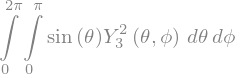

In [10]:
# Esta integral debería ser cero (por periodicidad de exp(i m phi)), pero SimPy no se da cuenta:
integrate(Ynm(3, 2, theta, phi)*sin(theta), (theta, 0, pi), (phi, 0, 2*pi))

In [11]:
# Pero esta integral no es cero (porque m=0):
integrate(Ynm(0, 0, theta, phi)*sin(theta), (theta, 0, pi), (phi, 0, 2*pi))

In [12]:
# En casos como este, expandir el resultado y luego simplificarlo puede ayudar. Usamos "_" para representar al último cálculo:
simplify((_).expand(func=True))

In [13]:
# También podemos integrar productos de armónicos esféricos contra la delta de Dirac
integrate(DiracDelta(theta)*Ynm(3, 2, theta, phi)*sin(theta), (theta, 0, pi), (phi, 0, 2*pi))

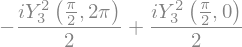

In [14]:
# Otro ejemplo de un producto de un armónico esférico contra la delta de Dirac:
integrate(DiracDelta(theta-pi/2)*Ynm(3, 2, theta, phi)*sin(theta), (theta, 0, pi), (phi, 0, 2*pi))

In [15]:
# Nuevamente, en este caso expandir el resultado y luego simplificarlo ayuda
simplify((_).expand(func=True))